# Data Collection

In [1]:
# Retreive the MCI Dataset from Toronto Open Data API

import requests

base_url = "https://ckan0.cf.opendata.inter.prod-toronto.ca"

# Datasets are called "packages". Each package can contain many "resources"
url = base_url + "/api/3/action/package_show"
params = { "id": "major-crime-indicators"}
package = requests.get(url, params = params).json()


# To get resource data:
for idx, resource in enumerate(package["result"]["resources"]):

    # For datastore_active resources:
    if resource["datastore_active"]:

        # To get all records in CSV format:
        url = base_url + "/datastore/dump/" + resource["id"]
        try:
            resource_dump_data = requests.get(url).text
            # Success message
            print("Data retrieved successfully.")
        except requests.exceptions.RequestException as e:
            # Error message
            print(f"Error retrieving data: {e}")        

Data retrieved successfully.


In [2]:
# Create pandas Dataframe

import pandas as pd
from io import StringIO

# read csv file into pandas dataframe
csv_file = StringIO(resource_dump_data)
data = pd.read_csv(csv_file)

# Print the DataFrame
data.head()

,_id,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,...,LOCATION_TYPE,PREMISES_TYPE,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140
0,1,GO-20141260127,NaN,NaN,2014,January,1,1,Wednesday,1,...,Bar / Restaurant,Commercial,1420,110,Assault Bodily Harm,Assault,84,Little Portugal,84,Little Portugal (84)
1,2,GO-20141263725,NaN,NaN,2014,January,1,1,Wednesday,19,...,"Apartment (Rooming House, Condo)",Apartment,1420,100,Assault With Weapon,Assault,78,Kensington-Chinatown,78,Kensington-Chinatown (78)
2,3,GO-20141264272,NaN,NaN,2014,January,1,1,Wednesday,21,...,"Apartment (Rooming House, Condo)",Apartment,1420,100,Assault With Weapon,Assault,85,South Parkdale,85,South Parkdale (85)
3,4,GO-20141263706,NaN,NaN,2014,January,1,1,Wednesday,18,...,"Single Home, House (Attach Garage, Cottage, Mo...",House,1430,100,Assault,Assault,113,Weston,113,Weston (113)
4,5,GO-20141263710,NaN,NaN,2014,January,1,1,Wednesday,18,...,"Apartment (Rooming House, Condo)",Apartment,1430,100,Assault,Assault,151,Yonge-Doris,51,Willowdale East (51)


# Exploratory data analysis (EDA)

In [3]:
# Retrieve list of columns, their data types, and information about missing values.
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384687 entries, 0 to 384686
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   _id                384687 non-null  int64  
 1   EVENT_UNIQUE_ID    384687 non-null  object 
 2   REPORT_DATE        64317 non-null   object 
 3   OCC_DATE           63991 non-null   object 
 4   REPORT_YEAR        384687 non-null  int64  
 5   REPORT_MONTH       384687 non-null  object 
 6   REPORT_DAY         384687 non-null  int64  
 7   REPORT_DOY         384687 non-null  int64  
 8   REPORT_DOW         384687 non-null  object 
 9   REPORT_HOUR        384687 non-null  int64  
 10  OCC_YEAR           384566 non-null  float64
 11  OCC_MONTH          384566 non-null  object 
 12  OCC_DAY            384566 non-null  float64
 13  OCC_DOY            384566 non-null  float64
 14  OCC_DOW            384566 non-null  object 
 15  OCC_HOUR           384687 non-null  int64  
 16  DI

In [4]:
# Summary of statistics for the DataFrame columns.
data.describe()

,_id,REPORT_YEAR,REPORT_DAY,REPORT_DOY,REPORT_HOUR,OCC_YEAR,OCC_DAY,OCC_DOY,OCC_HOUR,UCR_CODE,UCR_EXT
count,384687.000000,384687.000000,384687.000000,384687.000000,384687.000000,384566.000000,384566.000000,384566.000000,384687.000000,384687.000000,384687.000000
mean,192344.000000,2018.960825,15.746716,182.852891,12.705841,2018.900043,15.445227,182.485360,12.553590,1711.498785,147.520613
std,111049.715839,2.995790,8.771914,105.137876,6.464899,3.030055,8.932416,105.455768,7.278063,329.520772,52.279882
min,1.000000,2014.000000,1.000000,1.000000,0.000000,2000.000000,1.000000,1.000000,0.000000,1410.000000,100.000000
25%,96172.500000,2016.000000,8.000000,90.000000,8.000000,2016.000000,8.000000,90.000000,6.000000,1430.000000,100.000000
50%,192344.000000,2019.000000,16.000000,184.000000,13.000000,2019.000000,15.000000,183.000000,14.000000,1460.000000,100.000000
75%,288515.500000,2022.000000,23.000000,274.000000,18.000000,2022.000000,23.000000,274.000000,19.000000,2120.000000,200.000000
max,384687.000000,2024.000000,31.000000,366.000000,23.000000,2024.000000,31.000000,366.000000,23.000000,2135.000000,230.000000


In [5]:
# Print the number of rows and columns
print("the dimension:", data.shape)

the dimension: (384687, 27)


In [6]:
# Selects the values of the first row of DataFrame
data_values = data.iloc[0]
data_values

_id                                     1
EVENT_UNIQUE_ID            GO-20141260127
REPORT_DATE                           NaN
OCC_DATE                              NaN
REPORT_YEAR                          2014
REPORT_MONTH                      January
REPORT_DAY                              1
REPORT_DOY                              1
REPORT_DOW                     Wednesday 
REPORT_HOUR                             1
OCC_YEAR                           2014.0
OCC_MONTH                         January
OCC_DAY                               1.0
OCC_DOY                               1.0
OCC_DOW                        Wednesday 
OCC_HOUR                                1
DIVISION                              D14
LOCATION_TYPE            Bar / Restaurant
PREMISES_TYPE                  Commercial
UCR_CODE                             1420
UCR_EXT                               110
OFFENCE               Assault Bodily Harm
MCI_CATEGORY                      Assault
HOOD_158                          

In [7]:
# Print unique values for categorical values
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    unique_count = data[col].nunique()
    print("Unique count of column '{}': {}".format(col, unique_count))

Unique count of column 'EVENT_UNIQUE_ID': 335325
Unique count of column 'REPORT_DATE': 623
Unique count of column 'OCC_DATE': 731
Unique count of column 'REPORT_MONTH': 12
Unique count of column 'REPORT_DOW': 7
Unique count of column 'OCC_MONTH': 12
Unique count of column 'OCC_DOW': 7
Unique count of column 'DIVISION': 18
Unique count of column 'LOCATION_TYPE': 54
Unique count of column 'PREMISES_TYPE': 7
Unique count of column 'OFFENCE': 51
Unique count of column 'MCI_CATEGORY': 5
Unique count of column 'HOOD_158': 159
Unique count of column 'NEIGHBOURHOOD_158': 159
Unique count of column 'HOOD_140': 141
Unique count of column 'NEIGHBOURHOOD_140': 141


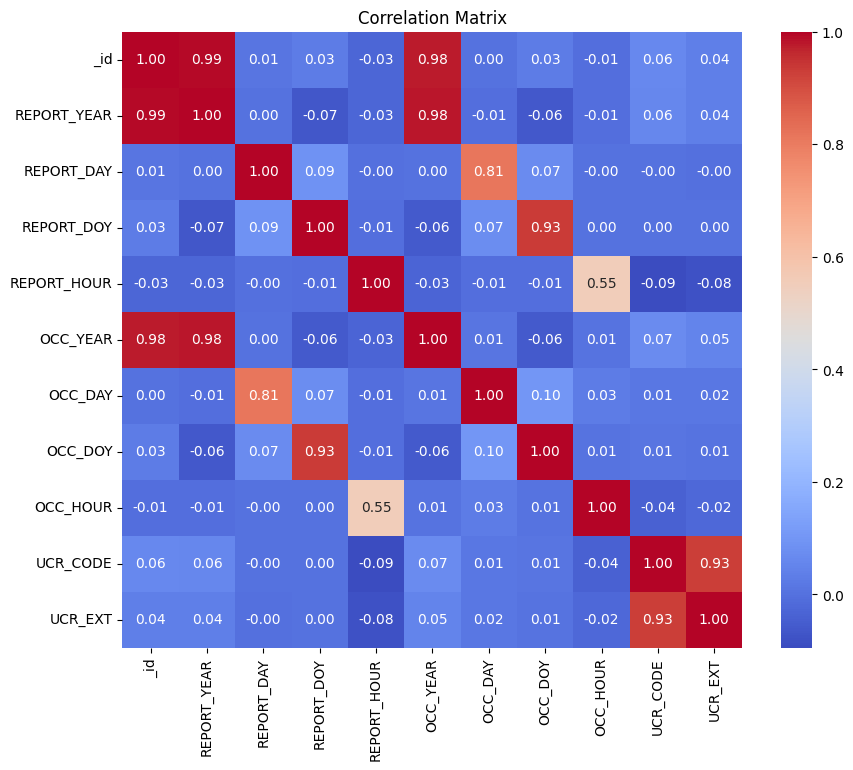

In [8]:
# Visualize corelation

import seaborn as sns
import matplotlib.pyplot as plt

data_correlation = data.corr(numeric_only=True)

# Plot correlation matrix with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [9]:
# Show unique values of the 'OCC_YEAR' column
data['OCC_YEAR'].value_counts().sort_index()

OCC_YEAR
2000.0       27
2001.0       22
2002.0       23
2003.0       19
2004.0       32
2005.0       36
2006.0       24
2007.0       38
2008.0       49
2009.0       83
2010.0      107
2011.0      143
2012.0      215
2013.0      627
2014.0    32483
2015.0    32943
2016.0    33661
2017.0    35551
2018.0    37555
2019.0    40113
2020.0    35219
2021.0    34805
2022.0    41448
2023.0    48402
2024.0    10941
Name: count, dtype: int64

# Data Cleaning and Transformation

In [10]:
# Filter data for data after 2013
data1 = data[data['OCC_YEAR'] > 2013]
data1['OCC_YEAR'].value_counts().sort_index()

OCC_YEAR
2014.0    32483
2015.0    32943
2016.0    33661
2017.0    35551
2018.0    37555
2019.0    40113
2020.0    35219
2021.0    34805
2022.0    41448
2023.0    48402
2024.0    10941
Name: count, dtype: int64

In [11]:
# Get count and percentage of Null Values

data_null_count = data1.isnull().sum()
data_null_percentage = (data1.isnull().sum() / data1.shape[0]) * 100
null_values = pd.DataFrame({
    'Null Count': data_null_count,
    'Null Percentage': data_null_percentage
})
null_values

,Null Count,Null Percentage
_id,0,0.000000
EVENT_UNIQUE_ID,0,0.000000
REPORT_DATE,319065,83.280478
OCC_DATE,319437,83.377575
REPORT_YEAR,0,0.000000
REPORT_MONTH,0,0.000000
REPORT_DAY,0,0.000000
REPORT_DOY,0,0.000000
REPORT_DOW,0,0.000000
REPORT_HOUR,0,0.000000


In [12]:
# REPORT_DATE and OCC_DATE columns have 83% missing values. We will recreate these columns by concatenating the other date columns.

data1['OCC_FULL_DATE'] = data1.apply(lambda row: pd.to_datetime(f"{int(row['OCC_YEAR'])}-{int(row['OCC_DOY']):03d}", format='%Y-%j').date(), axis=1)
data1['REPORT_FULL_DATE'] = data1.apply(lambda row: pd.to_datetime(f"{int(row['REPORT_YEAR'])}-{int(row['REPORT_DOY']):03d}", format='%Y-%j').date(), axis=1)

C:\Users\Robins\AppData\Local\Temp\ipykernel_5036\1472755819.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['OCC_FULL_DATE'] = data1.apply(lambda row: pd.to_datetime(f"{int(row['OCC_YEAR'])}-{int(row['OCC_DOY']):03d}", format='%Y-%j').date(), axis=1)
C:\Users\Robins\AppData\Local\Temp\ipykernel_5036\1472755819.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['REPORT_FULL_DATE'] = data1.apply(lambda row: pd.to_datetime(f"{int(row['REPORT_YEAR'])}-{int(row['REPORT_DOY']):03d}", format='%Y-

In [13]:
# Drop columns with 83% missing values
data2 = data1.drop(columns=['REPORT_DATE', 'OCC_DATE'], inplace=False)


In [14]:
# Verify that there are no more Null Values
data_null_count = data2.isnull().sum()
data_null_percentage = (data2.isnull().sum() / data2.shape[0]) * 100
null_values = pd.DataFrame({
    'Null Count': data_null_count,
    'Null Percentage': data_null_percentage
})
null_values

,Null Count,Null Percentage
_id,0,0.0
EVENT_UNIQUE_ID,0,0.0
REPORT_YEAR,0,0.0
REPORT_MONTH,0,0.0
REPORT_DAY,0,0.0
REPORT_DOY,0,0.0
REPORT_DOW,0,0.0
REPORT_HOUR,0,0.0
OCC_YEAR,0,0.0
OCC_MONTH,0,0.0


In [15]:
# The columns 'HOOD_140' and 'NEIGHBOURHOOD_140' are redundant, given that we can use 'NEIGHBOURHOOD_158' to retrieve neighborhood information.

data3 = data2.drop(columns=['HOOD_140', 'NEIGHBOURHOOD_140'], inplace=False)


In [16]:
# Save new DataFrame to an Excel file
data3.to_excel('../Data/TOR_mci.xlsx', index=False) 

In [17]:
# Create Mapping Table that will be used to generate relationships with other datasets (Homicide, Victims & Arrested)

pd.DataFrame({'Unique_DIVISION': data3['DIVISION'].unique()}).to_excel('../Data/TOR_Divisions.xlsx', index=False)

pd.DataFrame({'Unique_HOOD': data3['NEIGHBOURHOOD_158'].unique()}).to_excel('../Data/TOR_Neighbourhoods.xlsx', index=False)




# Visualization and reporting have been completed in Power BI. To view the dashboard, please navigate to my 'Dashboards' folder.